# Examination project - Monte Carlo methods in statistics

- Name: Duy Vu DINH
- Code: s2401627

## Question 1

Starting from the general form $\eta x^{\alpha - 1}(1 - x)^{\beta - 1}$, derive the normalizing constant for the beta distribution.

## Question 2

Plot the distribution $\text{Be}(\alpha, \beta)$ for different values of its shape parameters, covering all different possibilities. Describe the shape and skewness of the distribution in function of $\alpha$ and $\beta$. What happens if both shape parameters converge to $+\infty$? Can we recover the uniform distribution $\mathcal{U}[0, 1]$ using the beta distribution?

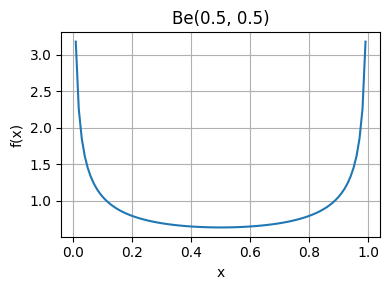

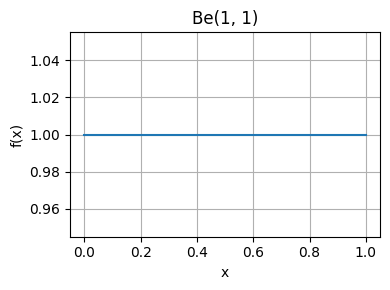

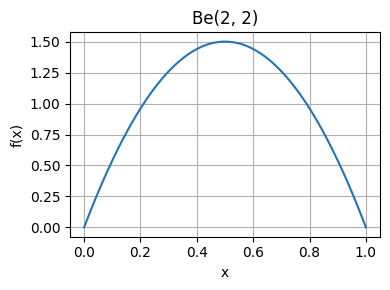

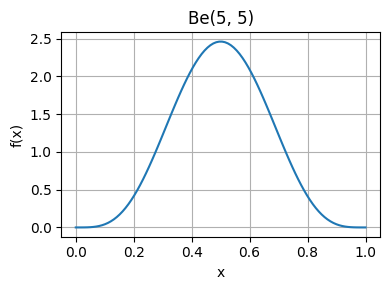

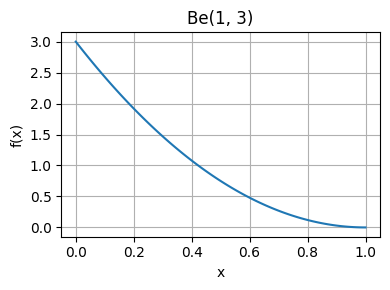

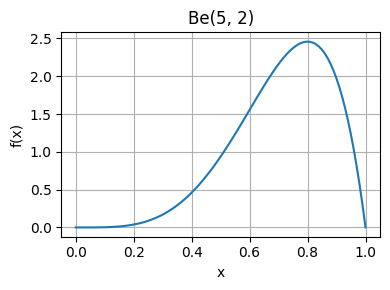

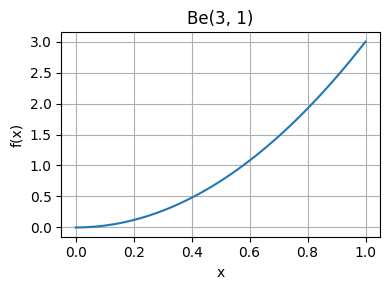

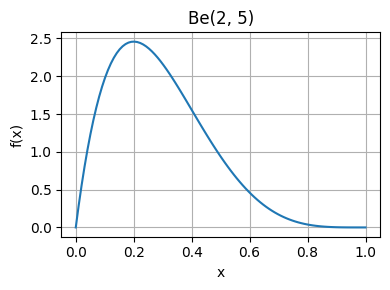

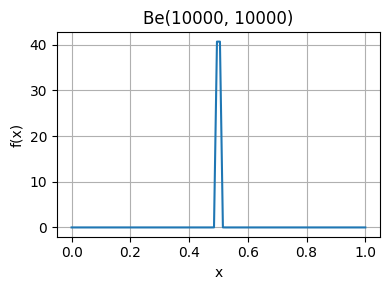

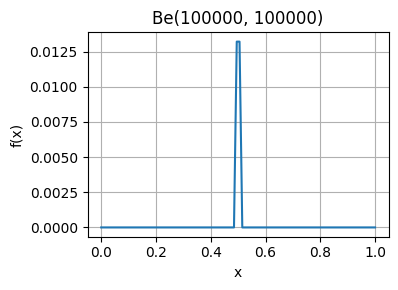

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

def plot_beta_distribution(alpha_val, beta_val, filename=None):
    """
    Plot a Beta distribution with given alpha and beta parameters, then save as a PDF.

    Parameters:
    - alpha_val (float): Shape parameter alpha of the Beta distribution.
    - beta_val (float): Shape parameter beta of the Beta distribution.
    - filename (str): Name of the file to export the plot (should end with .pdf).
    """
    x = np.linspace(0, 1, 100)
    y = beta.pdf(x, alpha_val, beta_val)

    plt.figure(figsize=(4, 3))
    plt.plot(x, y, label=f"Beta({alpha_val}, {beta_val})")
    plt.title(f"Be({alpha_val}, {beta_val})")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.tight_layout()

    if filename is None:
        os.makedirs("figures", exist_ok=True)
        filename = f"figures/q1-beta_distr-alpha_{alpha_val}-beta_{beta_val}.pdf"

    plt.savefig(filename, format='pdf')
    plt.show()

# Symmetric
plot_beta_distribution(0.5, 0.5) # U-shaped
plot_beta_distribution(1,1) # Uniform distribution
plot_beta_distribution(2, 2) # Bell-shaped
plot_beta_distribution(5, 5) # More peaked

# Left-skewed
plot_beta_distribution(1,3) # Left-skewed
plot_beta_distribution(5,2) # More left-skewed

# Right-skewed
plot_beta_distribution(3,1) # Right-skewed
plot_beta_distribution(2,5) # More right-skewed

# Edge case
plot_beta_distribution(10000,10000) # Very peaked around 0.5
plot_beta_distribution(100000,100000) # Very peaked around 0.5

## Question 3

Can we apply the inverse transform method to sample random values of a beta distribution? If yes, explain and implement the algorithm. Simulate 15,000 values of a $\text{Be}(3, 9)$ distribution. If no, explain why not.

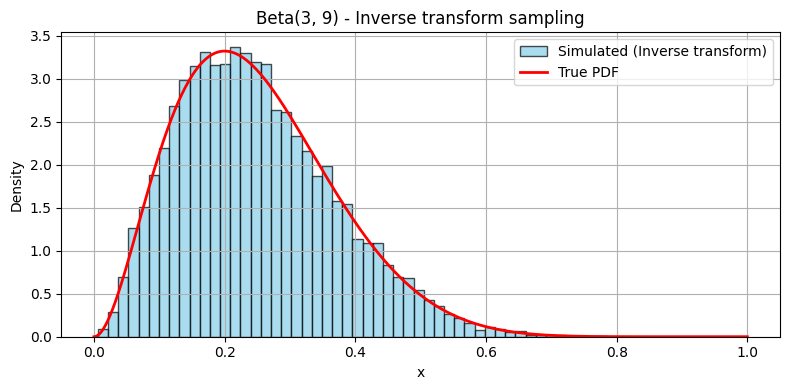

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters
a = 3
b = 9
n_samples = 15000

# Generate uniform random numbers
u = np.random.uniform(0, 1, size=n_samples)

# Apply the inverse CDF (quantile function)
samples = beta.ppf(u, a, b)

# Plot the histogram of the generated samples
plt.figure(figsize=(8, 4))
plt.hist(samples, bins=50, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Simulated (Inverse transform)')

# Plot the true Beta(3,9) density for comparison
x = np.linspace(0, 1, 1000)
plt.plot(x, beta.pdf(x, a, b), 'r-', lw=2, label='True PDF')

plt.title('Beta(3, 9) - Inverse transform sampling')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()

os.makedirs("figures", exist_ok=True)
plt.savefig("figures/q2-beta_inverse_transform_sampling.pdf")

plt.show()

## Question 4

In Chapter 3, a formula is given to simulate $\text{Be}(\alpha, \beta)$ from the uniform distribution, given that both parameters $\alpha$ and $\beta$ are natural numbers (and not equal to 0). Implement this transformation method algorithm and apply it to simulate 15,000 values of a $\text{Be}(3, 9)$ distribution.

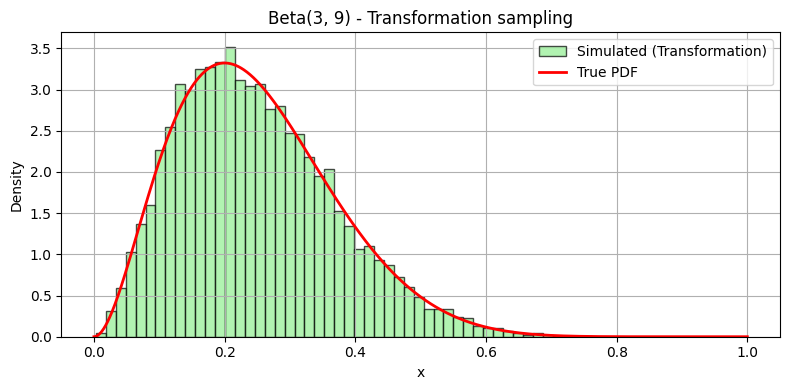

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters
a = 3
b = 9
n_samples = 15000

# Generate U_ij ~ Uniform(0, 1)
U = np.random.uniform(0, 1, size=(n_samples, a + b))
log_U = -np.log(U)

# Compute sum of first 'a' logs and sum of all a + b logs for each row
Sa = np.sum(log_U[:, :a], axis=1)
Sab = np.sum(log_U, axis=1)

# Apply the transformation
samples = Sa / Sab

# Plot histogram of generated samples
plt.figure(figsize=(8, 4))
plt.hist(samples, bins=50, density=True, color='lightgreen', edgecolor='black', alpha=0.7, label='Simulated (Transformation)')

# Plot the true Beta(3,9) density
x = np.linspace(0, 1, 1000)
plt.plot(x, beta.pdf(x, a, b), 'r-', lw=2, label='True PDF')

plt.title('Beta(3, 9) - Transformation sampling')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()

os.makedirs("figures", exist_ok=True)
plt.savefig("figures/q3-beta_transformation_sampling.pdf")

plt.show()

## Question 5

It is also possible to generate a beta distribution using gamma distributions. A gamma distribution $Ga(\alpha, \beta)$ is defined by the density function $f(x|\alpha, \beta) := \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha - 1} e^{-\beta x} \mathbb{I}_{[0, +\infty[}(x) \text{for } \alpha, \beta > 0$.

- (a) Show formally that if $Y_1 \sim Ga(\alpha, 1)$ and $Y_2 \sim Ga(\beta, 1)$ then $X = \frac{Y_1}{Y_1 + Y_2} \sim Be(\alpha, \beta)$.
- (b) Use this relation to construct an algorithm to generate a beta random variable and simulate 15,000 values from a $Be(3, 9)$.

### b.

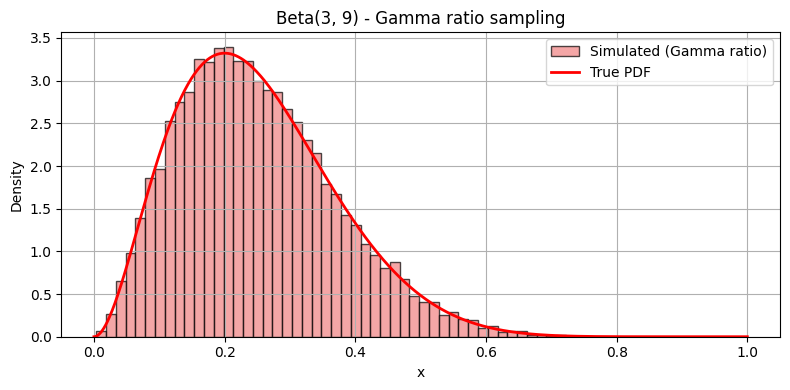

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, beta

# Parameters
a = 3
b = 9
n_samples = 15000

# Generate Y1 ~ Gamma(alpha, 1) and Y2 ~ Gamma(beta, 1)
Y1 = np.random.gamma(shape=a, scale=1.0, size=n_samples)
Y2 = np.random.gamma(shape=b, scale=1.0, size=n_samples)

# Compute X = Y1 / (Y1 + Y2)
samples = Y1 / (Y1 + Y2)

# Plot histogram of generated samples
plt.figure(figsize=(8, 4))
plt.hist(samples, bins=50, density=True, color='lightcoral', edgecolor='black', alpha=0.7, label='Simulated (Gamma ratio)')

# Plot the true Beta(3, 9) PDF
x = np.linspace(0, 1, 1000)
plt.plot(x, beta.pdf(x, a, b), 'r-', lw=2, label='True PDF')

plt.title('Beta(3, 9) - Gamma ratio sampling')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()

os.makedirs("figures", exist_ok=True)
plt.savefig("figures/q5-beta_gamma_ratio_sampling.pdf")

plt.show()

## Question 6

Compare the implemented procedures from questions 4 and 5 and the beta distribution generator incorporated in R in terms of their runtime (keep $n = 15,\!000$) as well as their precision (use different values of $n$).

Average runtime results (seconds) for n=15,000:
                 uniform_log  gamma_ratio   builtin
Sample Size (n)                                    
15000               0.002252     0.000736  0.000736

Average K-S statistic results (lower is better):
                 uniform_log  gamma_ratio   builtin
Sample Size (n)                                    
10                  0.265736     0.260140  0.257515
100                 0.085273     0.090019  0.087196
1000                0.027256     0.027618  0.027490
10000               0.008762     0.008787  0.008880
100000              0.002794     0.002694  0.002764
1000000             0.000862     0.000858  0.000856


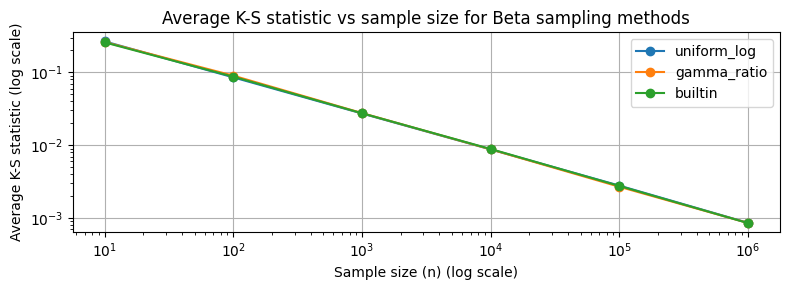

In [ ]:
import os
import time
import numpy as np
import pandas as pd
from scipy.stats import beta, kstest
import matplotlib.pyplot as plt

# Parameters
a = 3
b = 9
sample_sizes = [10, 100, 1000, 10000, 100000, 1000000]
n_runtime = 15000
n_experiments = 200

# Sampling methods
def method_uniform_log(n, alpha_val, beta_val):
    U = np.random.uniform(0, 1, size=(n, alpha_val + beta_val))
    log_U = -np.log(U)
    Sa = np.sum(log_U[:, :alpha_val], axis=1)
    Sab = np.sum(log_U, axis=1)
    return Sa / Sab

def method_gamma_ratio(n, alpha_val, beta_val):
    Y1 = np.random.gamma(alpha_val, 1, size=n)
    Y2 = np.random.gamma(beta_val, 1, size=n)
    return Y1 / (Y1 + Y2)

def method_builtin_beta(n, alpha_val, beta_val):
    return beta.rvs(alpha_val, beta_val, size=n)

# Containers for averaging
runtime_results = {'uniform_log': [], 'gamma_ratio': [], 'builtin': []}
ks_results = {'uniform_log': {n: [] for n in sample_sizes},
              'gamma_ratio': {n: [] for n in sample_sizes},
              'builtin': {n: [] for n in sample_sizes}}

# Measure runtime (n = 15000)
for _ in range(n_experiments):
    start = time.time()
    method_uniform_log(n_runtime, a, b)
    runtime_results['uniform_log'].append(time.time() - start)

    start = time.time()
    method_gamma_ratio(n_runtime, a, b)
    runtime_results['gamma_ratio'].append(time.time() - start)

    start = time.time()
    method_builtin_beta(n_runtime, a, b)
    runtime_results['builtin'].append(time.time() - start)

# Measure K-S statistic for all sample sizes
for n in sample_sizes:
    for i in range(n_experiments):
        samples = method_uniform_log(n, a, b)
        ks_results['uniform_log'][n].append(kstest(samples, 'beta', args=(a, b))[0])

        samples = method_gamma_ratio(n, a, b)
        ks_results['gamma_ratio'][n].append(kstest(samples, 'beta', args=(a, b))[0])

        samples = method_builtin_beta(n, a, b)
        ks_results['builtin'][n].append(kstest(samples, 'beta', args=(a, b))[0])

# Average results
avg_runtime = {method: np.mean(times) for method, times in runtime_results.items()}
avg_ks = {method: [np.mean(ks_results[method][n]) for n in sample_sizes] for method in ks_results.keys()}

# Create DataFrames
df_runtime = pd.DataFrame(avg_runtime, index=[n_runtime])
df_runtime.index.name = 'Sample Size (n)'

df_ks = pd.DataFrame(avg_ks, index=sample_sizes)
df_ks.index.name = 'Sample Size (n)'

print("Average runtime results (seconds) for n=15,000:")
print(df_runtime)

print("\nAverage K-S statistic results (lower is better):")
print(df_ks)

# plot K-S statistic
plt.figure(figsize=(8, 3))
for method, ks_values in avg_ks.items():
    plt.plot(sample_sizes, ks_values, marker='o', label=method)

plt.xlabel('Sample size (n) (log scale)')
plt.ylabel('Average K-S statistic (log scale)')
plt.title('Average K-S statistic vs sample size for Beta sampling methods')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()

os.makedirs("figures", exist_ok=True)
plt.savefig("figures/q6-beta_sampling_methods_ks_statistic.pdf")

plt.show()

## Question 7

In the case where $\alpha$ and $\beta$ are larger than 1 (but not necessarily natural numbers), it is possible to use the uniform distribution $\mathcal{U}[0, 1]$ as instrumental distribution.

- (a) Explain why this is possible and how to determine the limiting constant $C$.
- (b) Determine (using R) this limiting constant $C$ used in the Accept-Reject algorithm if the target distribution is $\text{Be}(3.3, 9.5)$.
- (c) Implement the algorithm and perform 15,000 simulations to obtain values from a $\text{Be}(3.3, 9.5)$ distribution.
- (d) Create a plot that shows all simulated values, distinguishing between the accepted (in green) and rejected values (in red). Also indicate the instrumental density and the true density function of the $\text{Be}(3.3, 9.5)$ distribution. Calculate the acceptance rate.
- (e) Show, in a general setting, that the probability of acceptance in an Accept-Reject algorithm with limiting constant $C$ on the density ratio $f/g$ is equal to $1/C$. Compare this result with the calculated value in the previous question.
- (f) Rewrite the algorithm to obtain $n = 15,\!000$ simulated (accepted) values from the $\text{Be}(3.3, 9.5)$ distribution. Does this influence the acceptance rate obtained by the Accept-Reject algorithm? Plot the simulated values and compare with the true distribution. Discuss your findings.

### b.

In [5]:
from scipy.stats import beta

# Parameters for Beta(3.3, 9.5)
a = 3.3
b = 9.5

# Mode formula for alpha > 1, beta > 1
def beta_mode(alpha, beta):
    return (alpha - 1) / (alpha + beta - 2)

# Compute the analytical limiting constant C using the mode
mode = beta_mode(a, b)
C_analytical = beta.pdf(mode, a, b)

print(f"Analytical limiting constant C: {C_analytical}, Mode: {mode}")

Analytical limiting constant C: 3.3680918088850795, Mode: 0.21296296296296294


### c.

In [ ]:
import numpy as np
from scipy.stats import beta

# Parameters
a = 3.3
b = 9.5

# Compute limiting constant C using the Beta mode
def beta_mode(alpha, beta):
    return (alpha - 1) / (alpha + beta - 2)

C = beta.pdf(beta_mode(a, b), a, b)
n_trials = 15000

# Accept-Reject simulation with fixed number of proposals
accepted = []
rejected = []

for _ in range(n_trials):
    x = np.random.uniform(0, 1)
    u = np.random.uniform(0, 1)
    fx = beta.pdf(x, a, b)
    if u < fx / C:
        accepted.append(x)
    else:
        rejected.append(x)

# Convert to arrays
accepted = np.array(accepted)
rejected = np.array(rejected)

### d.

Acceptance rate: 0.2936666666666667


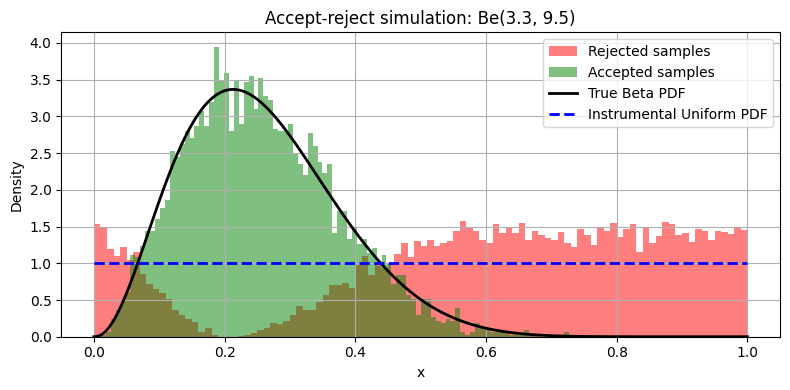

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Output acceptance rate
acceptance_rate = len(accepted) / (len(accepted) + len(rejected))

print(f"Acceptance rate: {acceptance_rate}")

# Prepare plot values
x_vals = np.linspace(0, 1, 1000)
true_beta_pdf = beta.pdf(x_vals, a, b)
uniform_pdf = np.ones_like(x_vals)

# Plotting
plt.figure(figsize=(8, 4))
plt.hist(rejected, bins=100, density=True, alpha=0.5, color='red', label='Rejected samples')
plt.hist(accepted, bins=100, density=True, alpha=0.5, color='green', label='Accepted samples')
plt.plot(x_vals, true_beta_pdf, 'k-', lw=2, label='True Beta PDF')
plt.plot(x_vals, uniform_pdf, 'b--', lw=2, label='Instrumental Uniform PDF')
plt.title(r'Accept-reject simulation: Be(3.3, 9.5)')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()

os.makedirs("figures", exist_ok=True)
plt.savefig("figures/q7d-beta_accept_reject.pdf")

plt.show()

### e.

In [36]:
# Recompute theoretical acceptance probability
theoretical_acceptance_rate = 1 / C_analytical

# Compare to empirical
comparison = {
    "Theoretical acceptance rate (1/C)": theoretical_acceptance_rate,
    "Empirical acceptance rate": acceptance_rate,
    "Absolute difference": abs(theoretical_acceptance_rate - acceptance_rate)
}

print(comparison)

{'Theoretical acceptance rate (1/C)': np.float64(0.2969040206570332), 'Empirical acceptance rate': 0.2936666666666667, 'Absolute difference': np.float64(0.0032373539903665094)}


### f.

Final acceptance rate (exact 15,000 accepts): 0.29611497157296274


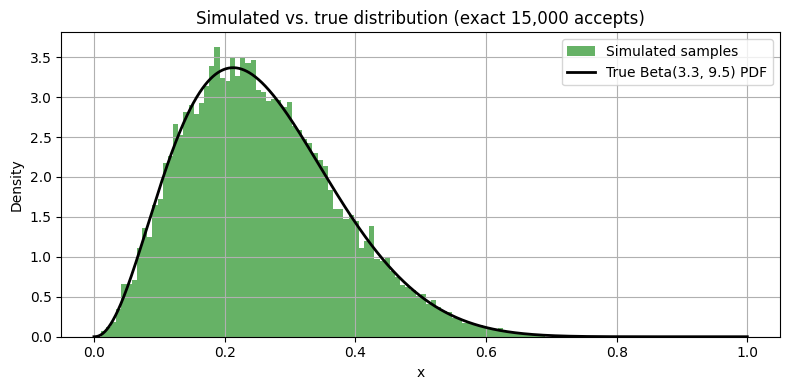

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters
a = 3.3
b = 9.5
target_n = 15000

accepted_f = []
total_trials_f = 0

while len(accepted_f) < target_n:
    x = np.random.uniform(0, 1)
    u = np.random.uniform(0, 1)
    fx = beta.pdf(x, a, b)
    if u < fx / C:
        accepted_f.append(x)
    total_trials_f += 1

# Convert to NumPy array
accepted_f = np.array(accepted_f)

# Compute updated acceptance rate
acceptance_rate_f = target_n / total_trials_f

print(f"Final acceptance rate (exact 15,000 accepts): {acceptance_rate_f}")

# Plot histogram of accepted samples vs. true PDF
plt.figure(figsize=(8, 4))
plt.hist(accepted_f, bins=100, density=True, alpha=0.6, label='Simulated samples', color='green')
plt.plot(x_vals, true_beta_pdf, 'k-', lw=2, label='True Beta(3.3, 9.5) PDF')
plt.title('Simulated vs. true distribution (exact 15,000 accepts)')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()

os.makedirs("figures", exist_ok=True)
plt.savefig("figures/q7f-beta_fixed_15k_accepts.pdf")

plt.show()

## Question 8

Another option for the instrumental distribution in the Accept-Reject algorithm is to use another beta distribution. Since we saw before how to simulate random values from a beta distribution for which the shape parameters take on natural values, we will use this kind of beta distribution.

- (a) Show formally that, for the ratio $f/g$ to be bounded when $f$ is a $\text{Be}(\alpha, \beta)$ density and $g$ is a $\text{Be}(a, b)$ density, we must have both $a \leq \alpha$ and $b \leq \beta$. Determine the maximal ratio in terms of $\alpha$, $\beta$, $a$, and $b$.
- (b) Redo questions 7(b) to 7(d) with the appropriate beta distribution as instrumental distribution. Compare both methods.

### b.

Acceptance rate: 0.9298666666666666, Limiting constant C: 1.076142489567204, Mode: 0.37499999999999983


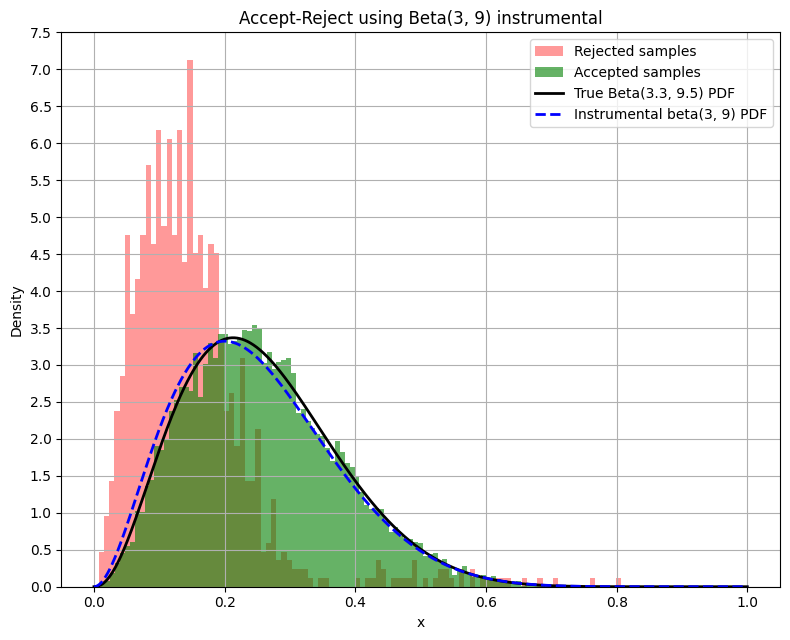

In [43]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.special import beta as beta_func

# Parameters
alpha_target = 3.3
beta_target = 9.5
a_instrument = 3
b_instrument = 9

# Compute limiting constant C for f/g
def compute_beta_ratio_max(alpha, beta, a, b):
    B_ab = beta_func(a, b)
    B_alpha_beta = beta_func(alpha, beta)
    x_mode = (alpha - a) / ((alpha - a) + (beta - b))
    ratio = (B_ab / B_alpha_beta) * \
            (x_mode ** (alpha - a)) * ((1 - x_mode) ** (beta - b))
    return ratio, x_mode

C_beta, x_max = compute_beta_ratio_max(alpha_target, beta_target, a_instrument, b_instrument)

# Accept-Reject simulation using Beta(3, 9) as instrumental distribution
n_trials = 15000
accepted_beta = []
rejected_beta = []
total_trials_beta = 0

for _ in range(n_trials):
    x = np.random.beta(a_instrument, b_instrument)
    u = np.random.uniform(0, 1)
    fx = beta.pdf(x, alpha_target, beta_target)
    gx = beta.pdf(x, a_instrument, b_instrument)
    if u < fx / (C_beta * gx):
        accepted_beta.append(x)
    else:
        rejected_beta.append(x)
    total_trials_beta += 1

acceptance_rate_beta = len(accepted_beta) / total_trials_beta

print(f"Acceptance rate: {acceptance_rate_beta}, Limiting constant C: {C_beta}, Mode: {x_max}")

# Prepare plot
x_vals = np.linspace(0, 1, 1000)
true_pdf = beta.pdf(x_vals, alpha_target, beta_target)
instrument_pdf = beta.pdf(x_vals, a_instrument, b_instrument)

plt.figure(figsize=(8, 6.5))
plt.hist(rejected_beta, bins=100, density=True, alpha=0.4, color='red', label='Rejected samples')
plt.hist(accepted_beta, bins=100, density=True, alpha=0.6, color='green', label='Accepted samples')
plt.plot(x_vals, true_pdf, 'k-', lw=2, label='True Beta(3.3, 9.5) PDF')
plt.plot(x_vals, instrument_pdf, 'b--', lw=2, label='Instrumental beta(3, 9) PDF')
plt.title('Accept-Reject using Beta(3, 9) instrumental')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.yticks(ticks=np.arange(0, plt.ylim()[1] + 0.5, 0.5))
plt.grid(True, which='major', axis='both')
plt.tight_layout()

os.makedirs("figures", exist_ok=True)
plt.savefig("figures/q8b-beta_instrumental.pdf")

plt.show()

## Question 9

Show that, for $X$ an observation from the negative binomial distribution $NB(r, p)$, the family of beta distributions $\text{Be}(\alpha, \beta)$ is a family of conjugate priors.

## Question 10

In Chapter 2, we estimated the shape parameters of the beta distribution using the maximum likelihood estimator. The problem, however, has no explicit solution. Another option is to use the Method of Moments (MOM) to determine $\hat{\alpha}$ and $\hat{\beta}$. As the name implies, the moments up to order $k$ will be used to estimate the $k$ parameters of a distribution.

- (a) Show that for the gamma function, the following property holds: $\Gamma(\alpha + 1) = \alpha \Gamma(\alpha)$, $\alpha > 0$. As such, the gamma function can be seen as a generalization of factorials.
- (b) Determine the moment of order $t$ of a $\text{Be}(\alpha, \beta)$ distribution.
- (c) Use this formula to obtain the expected value $\mathbb{E}[X]$ and variance $\text{Var}(X)$ for $X \sim \text{Be}(\alpha, \beta)$.
- (d) Use the Monte Carlo approach to estimate the shape parameters of a $\text{Be}(9, 3)$ distribution (set $n = 15,\!000$).

### d.

In [ ]:
import numpy as np

# Parameters
a = 9
b = 3
n_samples = 15000

# Generate samples from Beta(9, 3)
samples = np.random.beta(a, b, size=n_samples)

# Calculate sample mean and variance
sample_mean = np.mean(samples)
sample_var = np.var(samples, ddof=1)  # unbiased estimator

# Use method of moments formulas to estimate alpha and beta
common_factor = (sample_mean * (1 - sample_mean) / sample_var) - 1
alpha_est = sample_mean * common_factor
beta_est = (1 - sample_mean) * common_factor

print(f"Estimated alpha: {alpha_est}")
print(f"Estimated beta: {beta_est}")

Estimated alpha: 9.075392014543961
Estimated beta: 3.0359337414916547


## Question 11

Finally, let us compare both estimation methods (MLE and MOM). To this end, set the number of simulations equal to $Nsim = 1500$.

- (a) Use the previous implementation for the MOM and use the function \texttt{ebeta} contained in the package \texttt{EnvStats} for the MLE estimator for the beta distribution to create histograms illustrating the distribution of each of the shape parameters.
- (b) Evaluate the efficiency of each method in terms of bias and variance. Compare the results.
- (c) Illustrate the asymptotic normality of the obtained MLE estimators.

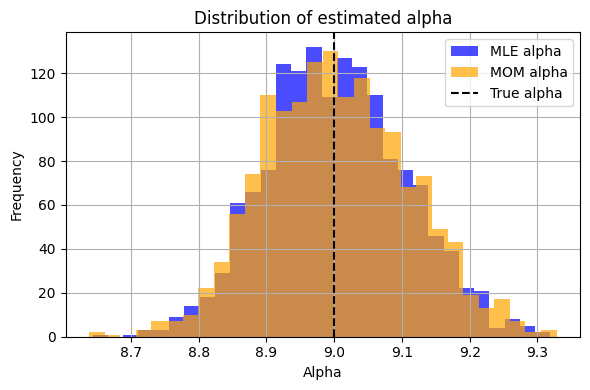

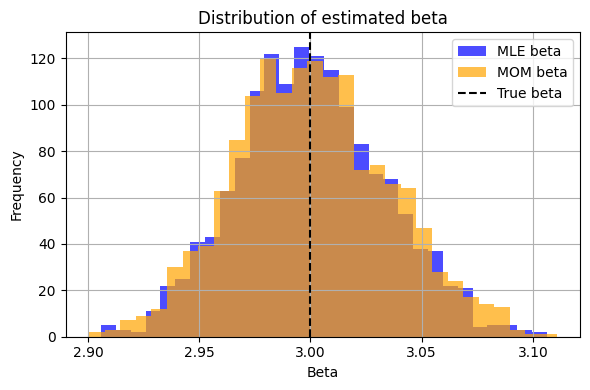

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters
alpha_true = 9
beta_true = 3
n_samples = 15000

# Number of simulations
Nsim = 1500

# Containers for estimated parameters
mle_alpha = []
mle_beta = []
mom_alpha = []
mom_beta = []

def method_of_moments(samples):
    mean = np.mean(samples)
    var = np.var(samples, ddof=1)
    common = mean * (1 - mean) / var - 1
    alpha_est = mean * common
    beta_est = (1 - mean) * common
    return alpha_est, beta_est

for _ in range(Nsim):
    # Generate samples
    data = np.random.beta(alpha_true, beta_true, size=n_samples)
    
    # MOM estimation
    a_mom, b_mom = method_of_moments(data)
    mom_alpha.append(a_mom)
    mom_beta.append(b_mom)
    
    # MLE estimation using scipy.stats.beta.fit
    a_mle, b_mle, loc, scale = beta.fit(data, floc=0, fscale=1)
    mle_alpha.append(a_mle)
    mle_beta.append(b_mle)

# Plot histogram for Alpha estimates
plt.figure(figsize=(6, 4))
plt.hist(mle_alpha, bins=30, alpha=0.7, label='MLE alpha', color='blue')
plt.hist(mom_alpha, bins=30, alpha=0.7, label='MOM alpha', color='orange')
plt.axvline(alpha_true, color='black', linestyle='dashed', label='True alpha')
plt.title('Distribution of estimated alpha')
plt.xlabel('Alpha')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()

os.makedirs("figures", exist_ok=True)
plt.savefig("figures/q11a-estimated_alpha_histogram.pdf")

plt.show()

# Plot histogram for Beta estimates
plt.figure(figsize=(6, 4))
plt.hist(mle_beta, bins=30, alpha=0.7, label='MLE beta', color='blue')
plt.hist(mom_beta, bins=30, alpha=0.7, label='MOM beta', color='orange')
plt.axvline(beta_true, color='black', linestyle='dashed', label='True beta')
plt.title('Distribution of estimated beta')
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()

os.makedirs("figures", exist_ok=True)
plt.savefig("figures/q11a-estimated_beta_histogram.pdf")

plt.show()

In [ ]:
import numpy as np

# Convert lists to numpy arrays
mle_alpha_arr = np.array(mle_alpha)
mle_beta_arr = np.array(mle_beta)
mom_alpha_arr = np.array(mom_alpha)
mom_beta_arr = np.array(mom_beta)

# Parameters
alpha_true = 9
beta_true = 3

# Calculate bias and variance for alpha
bias_mle_alpha = np.mean(mle_alpha_arr) - alpha_true
var_mle_alpha = np.var(mle_alpha_arr, ddof=1)

bias_mom_alpha = np.mean(mom_alpha_arr) - alpha_true
var_mom_alpha = np.var(mom_alpha_arr, ddof=1)

# Calculate bias and variance for beta
bias_mle_beta = np.mean(mle_beta_arr) - beta_true
var_mle_beta = np.var(mle_beta_arr, ddof=1)

bias_mom_beta = np.mean(mom_beta_arr) - beta_true
var_mom_beta = np.var(mom_beta_arr, ddof=1)

print("Alpha parameter:")
print(f"MLE Bias: {bias_mle_alpha:.6f}, Variance: {var_mle_alpha:.6f}")
print(f"MOM Bias: {bias_mom_alpha:.6f}, Variance: {var_mom_alpha:.6f}")

print("\nBeta parameter:")
print(f"MLE Bias: {bias_mle_beta:.6f}, Variance: {var_mle_beta:.6f}")
print(f"MOM Bias: {bias_mom_beta:.6f}, Variance: {var_mom_beta:.6f}")

Alpha parameter:
MLE Bias: 0.002573, Variance: 0.010503
MOM Bias: 0.003619, Variance: 0.011518

Beta parameter:
MLE Bias: 0.000461, Variance: 0.001087
MOM Bias: 0.000858, Variance: 0.001211


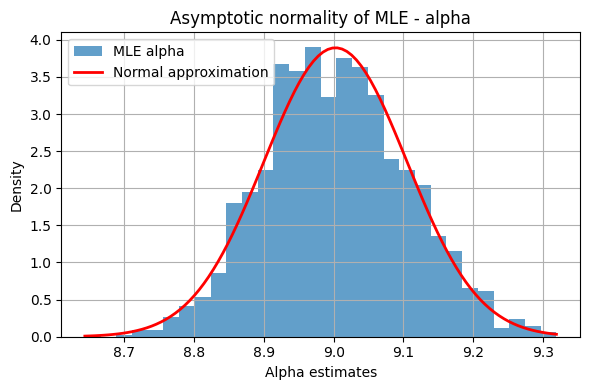

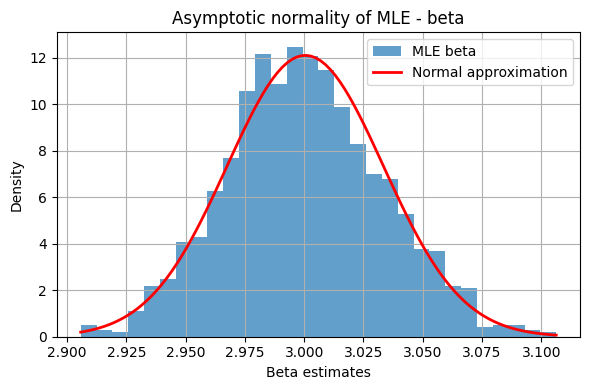

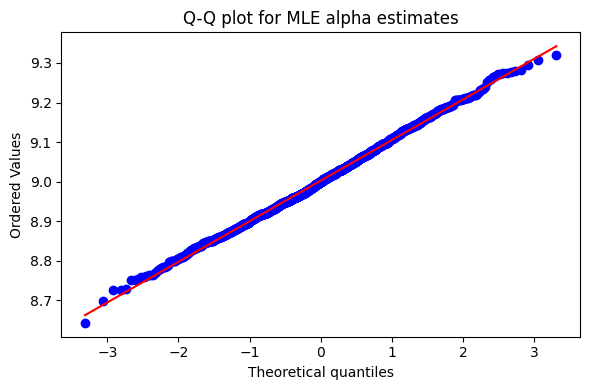

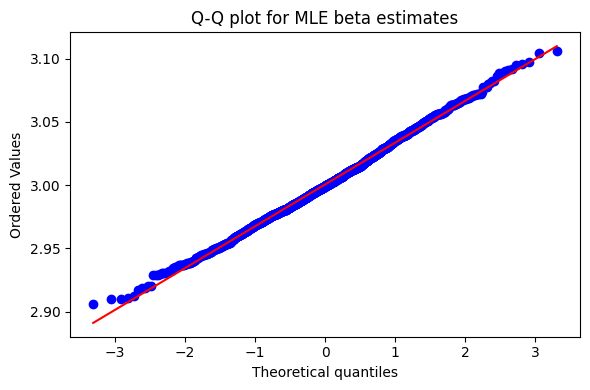

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Mean and std of MLE estimates
mle_alpha_mean = np.mean(mle_alpha_arr)
mle_alpha_std = np.std(mle_alpha_arr, ddof=1)
mle_beta_mean = np.mean(mle_beta_arr)
mle_beta_std = np.std(mle_beta_arr, ddof=1)

x_alpha = np.linspace(min(mle_alpha_arr), max(mle_alpha_arr), 100)
x_beta = np.linspace(min(mle_beta_arr), max(mle_beta_arr), 100)

# Normal PDFs for overlay
normal_pdf_alpha = stats.norm.pdf(x_alpha, mle_alpha_mean, mle_alpha_std)
normal_pdf_beta = stats.norm.pdf(x_beta, mle_beta_mean, mle_beta_std)

# Plot histogram + normal overlay for alpha
plt.figure(figsize=(6, 4))
plt.hist(mle_alpha_arr, bins=30, density=True, alpha=0.7, label='MLE alpha')
plt.plot(x_alpha, normal_pdf_alpha, 'r-', lw=2, label='Normal approximation')
plt.title('Asymptotic normality of MLE - alpha')
plt.xlabel('Alpha estimates')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()

os.makedirs("figures", exist_ok=True)
plt.savefig("figures/q11c-alpha_mle_histogram.pdf")


plt.show()

# Plot histogram + normal overlay for beta
plt.figure(figsize=(6, 4))
plt.hist(mle_beta_arr, bins=30, density=True, alpha=0.7, label='MLE beta')
plt.plot(x_beta, normal_pdf_beta, 'r-', lw=2, label='Normal approximation')
plt.title('Asymptotic normality of MLE - beta')
plt.xlabel('Beta estimates')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()

os.makedirs("figures", exist_ok=True)
plt.savefig("figures/q11c-beta_mle_histogram.pdf")

plt.show()

# Q-Q plot for alpha
plt.figure(figsize=(6, 4))
stats.probplot(mle_alpha_arr, dist="norm", plot=plt)
plt.title('Q-Q plot for MLE alpha estimates')
plt.tight_layout()

os.makedirs("figures", exist_ok=True)
plt.savefig("figures/q11c-alpha_mle_qqplot.pdf")

plt.show()

# Q-Q plot for beta
plt.figure(figsize=(6, 4))
stats.probplot(mle_beta_arr, dist="norm", plot=plt)
plt.title('Q-Q plot for MLE beta estimates')
plt.tight_layout()

os.makedirs("figures", exist_ok=True)
plt.savefig("figures/q11c-beta_mle_qqplot.pdf")

plt.show()